# NLP Answers

- **Answer Set**: No. 04
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [20]:
import warnings

import math as math
import hazm as hazm

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import sklearn.tree as sktree
import sklearn.ensemble as skensemble

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection
import sklearn.feature_extraction.text as sktext

warnings.filterwarnings("ignore", category=UserWarning)
sk.set_config(display="diagram")

### Dataset

Now we will load `Persica` corpus and split it into `TestSet` and `TrainSet`:

In [21]:
corpus = hazm.PersicaReader(csv_file="../lib/persica.csv")

data_frame = pd.DataFrame(corpus.docs())
data_frame = skutils.shuffle(data_frame)

data_features = data_frame.filter(["text"], axis=1).to_numpy().flatten()
data_labels = data_frame.filter(["category2"], axis=1).to_numpy().flatten()

data_labels = skprocessing.LabelEncoder().fit(data_labels).transform(data_labels)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.2, 
    random_state=313
)

data_frame

,id,title,text,date,time,category,category2
6086,745444,"""لحظه‌ي تصميم گيري در سازمان ملل"" به قلم كوفي ...",دبيركل سازمان ملل متحد در مقاله‌اي به توضيح مو...,138/5//04,1:4::25,بين‌الملل-گزارش و تحليل-,سياسي
10291,50396,فيفا از وضعيت ورزشگاههاي ميزبان جام جهاني 2002...,خبرگزاري دانشجويان ايران - تهران سرويس: ورزشي,138/0//03,1:3::27,ورزشي-,ورزشي
7634,188889,علي كريمي : دولت از موزيسين‌هاي موسيقي سنتي‌ ح...,علي كريمي كه با خبرنگار سرويس موسيقي ايسنا سخن...,138/1//10,0:0::03,فرهنگ و هنر-موسيقي-,فرهنگي
7150,69039,اخباري درباره‌ي چند ويروس كامپيوتري / ‌٢ /,دومين بخش از اين گزارش‌ها به نقل از شركت مهندس...,138/0//06,1:7::15,علمي-فناوري-,علمي
1216,263366,توضيح روابط عمومي وزارت علوم درباره درخواست اس...,به گزارش سرويس آموزشي ايسنا، در اين نمابر آمده...,138/2//05,1:5::21,آموزشي-,آموزشي
...,...,...,...,...,...,...,...
2951,209882,رييس دانا: توطئه‌ي آمريكا براي لوث كردن جنبش‌ه...,دكتر رييس‌دانا، اقتصاددان و پژوهشگر اجتماعي در...,138/2//01,1:3::30,اقتصاد و بازرگاني-,اقتصادي
7288,896120,اكيپ‌هاي ثابت و سيار تعميرات خودرو براي خدمات‌...,به گزارش ايسنا، به‌منظور سرويس‌دهي به كاروان‌ه...,138/6//01,1:1::36,فرهنگ و حماسه-,فرهنگي
10150,726755,كشتي‌گيران شركت كننده در جام اوماخانوف مشخص شدند,به گزارش ايسنا، جام اوماخانوف در روزهاي 27 و 2...,138/5//03,1:0::11,ورزشي-كشتي-,ورزشي
10312,448127,انتخابات فدراسيون جهاني وزنه‌برداري؛ شرايط كان...,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، ريي...,138/3//08,1:1::15,قهرماني-همگاني-,ورزشي


### Analysis

Now, we will analyse `DataSet`, `TrainSet`, `TestSet` and will find these parameters:

- **Sentence Count**: Number of sentences
- **Word Count**: Number of words
- **Unique Word Count**: Number of unique words
- **Average Word/Sentence**: Average number of words per sentence

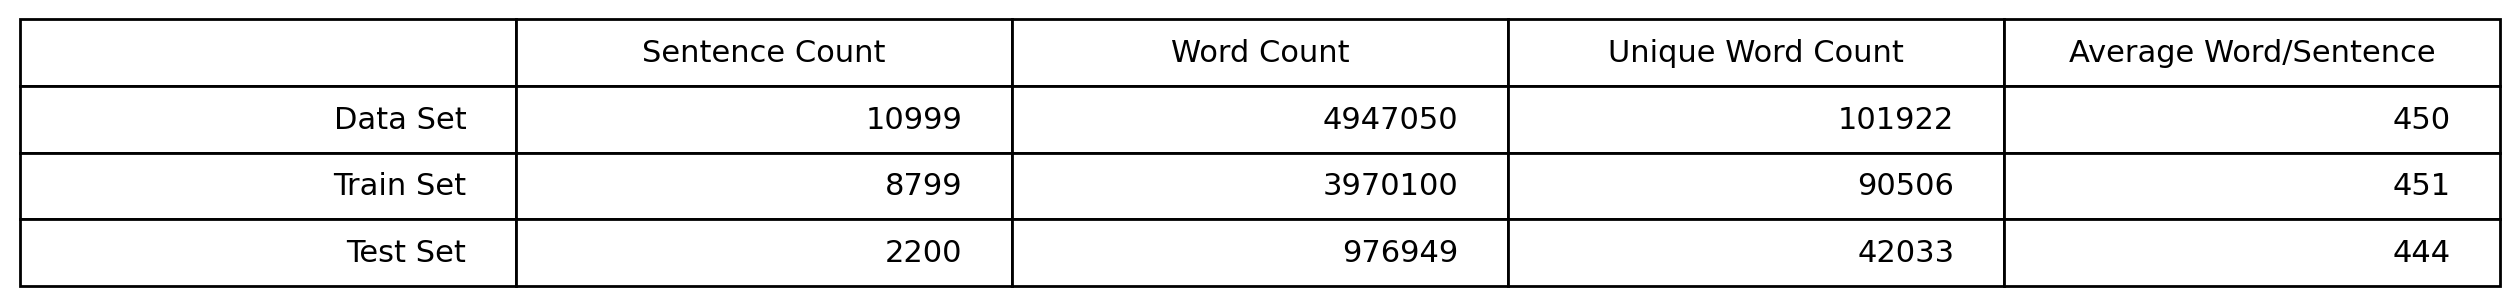

In [22]:
data_words = hazm.word_tokenize('. '.join(data_features))
train_words = hazm.word_tokenize('. '.join(train_features))
test_words = hazm.word_tokenize('. '.join(test_features))

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Data Set",
        len(data_features),
        len(data_words),
        len(set(data_words)),
        round(len(data_words) / len(data_features))
    ],
    [
        "Train Set",
        len(train_features),
        len(train_words),
        len(set(train_words)),
        round(len(train_words) / len(train_features))
    ],
    [
        "Test Set",
        len(test_features),
        len(test_words),
        len(set(test_words)),
        round(len(test_words) / len(test_features))
    ]
], colLabels=["", "Sentence Count", "Word Count", "Unique Word Count", "Average Word/Sentence"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---

## Problem

Before the begin, we will use `CountVectorizer` inorder to find count vector of `ngrams` for each document, then we will use `TfidfTransformer` inorder to compute `TF-IDF` vectors for each document.

We will use **hazm** library inorder to apply these preprocessing steps:

- **Stemmer**
- **Normalizer**
- **Lemmatizer**
- **Stop Words Removal**

Then we will fit two types of predictor models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

In [23]:
stemmer = hazm.Stemmer()
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()
stop_words = hazm.stopwords_list("../lib/PersianStopWords.txt")

def tokernizer(sentence):
    return [
        lemmatizer.lemmatize(normalizer.normalize(stemmer.stem(word)))
        for word in hazm.word_tokenize(sentence)
        if word not in stop_words
    ]

### Decision Tree

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Decision Tree** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [24]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 2)],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'vectorizer__ngram_range': [(1, 2)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x0000026C9C8A7310>]},
             scoring='accuracy')

### Random Forest

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Random Forest** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [25]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 2)],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'vectorizer__ngram_range': [(1, 2)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x0000026C9C8A7310>]},
             scoring='accuracy')

### Results

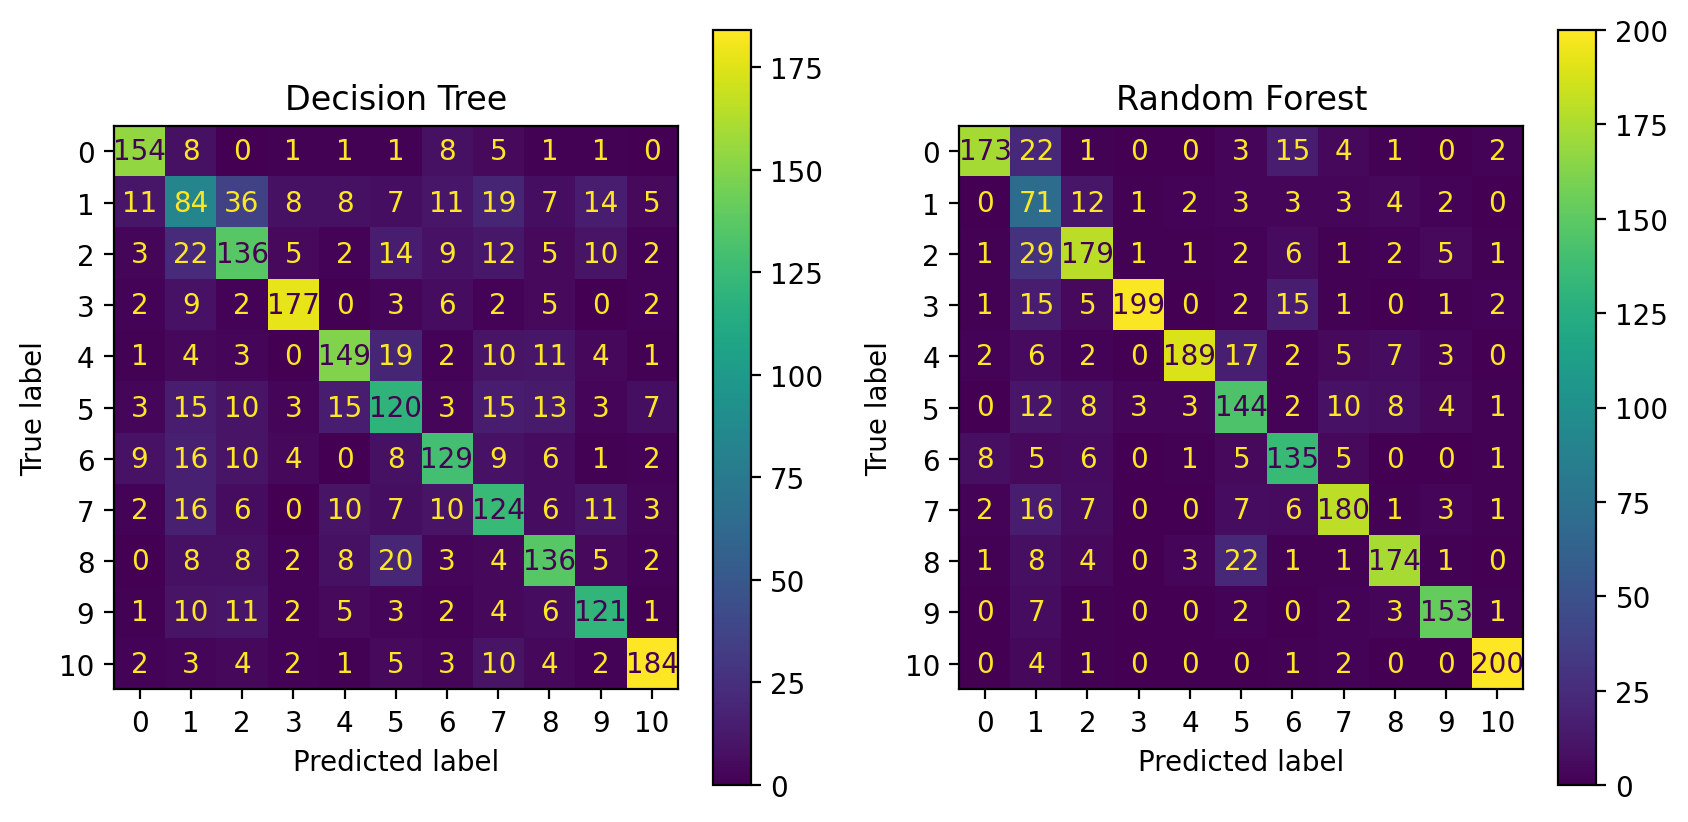

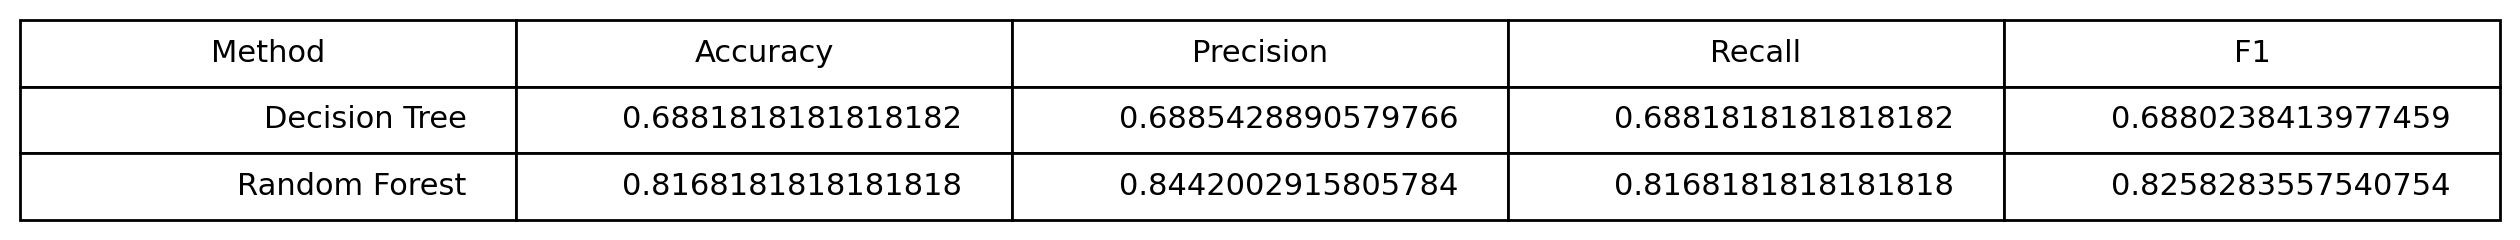

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
], colLabels=["Method", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---